<h1>Custom algorithm to quantify edge cases like the yellow color infection pattern</h1>

In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


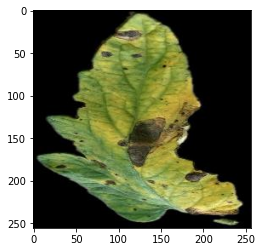

In [15]:
#reading the image
imgNo=49

imgPath='/home/aahan/Documents/Minor Project/Tomato Early Blight/EB{}.jpg'.format(imgNo)
image=cv2.cvtColor(cv2.imread(imgPath),cv2.COLOR_BGR2RGB)

# resImg=[]
# for pixel in image.reshape(-1,3):
#     r,g,b=pixel[0],pixel[1],pixel[2]
#     if r==0 and g==0 and b==0:
#         resImg.append([255,255,255])
#     else:
#         resImg.append(pixel)
# image=np.array(resImg,dtype=np.uint8).reshape(image.shape)
        

plt.imshow(image)

image=cv2.cvtColor(image,cv2.COLOR_RGB2LAB)

l,a,b=cv2.split(image)

l,a,b=(l.flatten(),a.flatten(),b.flatten())




<h1> K-means Clustering Start</h1>

<h2>Elbow Method</h2>

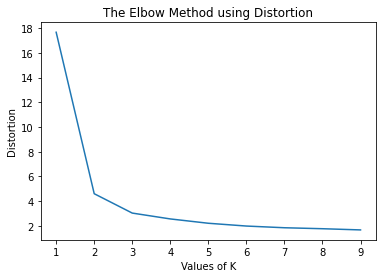

In [69]:
vector=image[:,:,1:]
vector=vector.reshape(-1,2)

distortions=[]
mappings={}

K_range=range(1,10)

for k in K_range:
    kmean=KMeans(n_clusters=k).fit(vector)
    kmean.fit(vector)
    distortions.append(sum(np.min(cdist(vector, kmean.cluster_centers_,'euclidean'), axis=1)) / vector.shape[0])
    mappings[k] = sum(np.min(cdist(vector, kmean.cluster_centers_,'euclidean'), axis=1)) / vector.shape[0]

plt.plot(K_range, distortions)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

(256, 256, 2)
(256, 256, 3)


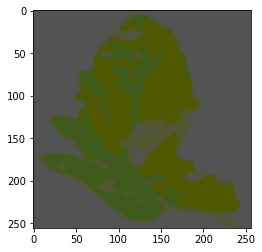

In [16]:
#create a vector containing a*b* channel
shape=image.shape

vector=image[:,:,1:]
print(vector.shape)
vector=vector.reshape(-1,2)

#convert to float32
vector=np.float32(vector)

#criteria
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
K=4
attempts=10
ret,label,center=cv2.kmeans(vector,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

# print(label)

center=np.uint8(center)
res=center[label.flatten()]

resArr=[]
for ele in res:
    a,b=ele[0],ele[1]
    resArr.append([90,a,b])
resArr=np.array(resArr,dtype=np.uint8)
resArr=resArr.reshape(shape)
print(resArr.shape)


rtArr=cv2.cvtColor(resArr,cv2.COLOR_LAB2RGB)
plt.imshow(rtArr)


In [17]:
#pixel dict
from collections import defaultdict
colors=defaultdict(int)

for pixel in resArr.reshape(-1,3):
    pixel=list(pixel)
    colors['l:{}a:{}b:{}'.format(pixel[0],pixel[1],pixel[2])]+=1
print(colors)

# maxPix=max(colors,key=colors.get)

# print(maxPix)

defaultdict(<class 'int'>, {'l:90a:127b:128': 34281, 'l:90a:120b:148': 5958, 'l:90a:106b:160': 11003, 'l:90a:114b:175': 14294})


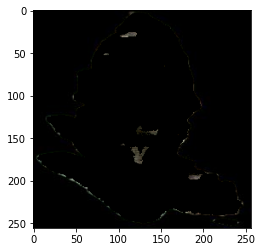

In [18]:
resImg=[]
image=cv2.cvtColor(cv2.imread(imgPath),cv2.COLOR_BGR2RGB)

for ele1,ele2 in zip(resArr.reshape(-1,3),image.reshape(-1,3)):
    l,a,b=(ele1[0],ele1[1],ele1[2])
    if l==90 and a==127 and b==128:
        resImg.append([ele2[0],ele2[1],ele2[2]])
        continue
    resImg.append([0,0,0])
resImg=np.array(resImg).reshape(resArr.shape)
plt.imshow(resImg)

<h1>Segmenting the image based on color</h1>

<h3>a channel</h3>

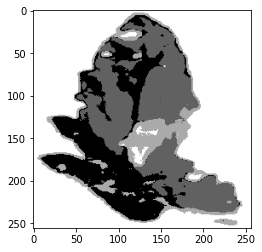

In [19]:
rows,cols,_=resArr.shape
a_channel=resArr[:,:,1]
b_channel=resArr[:,:,2]

# plt.imshow(a_channel,cmap='gray')
plt.imshow(a_channel,cmap='gray')


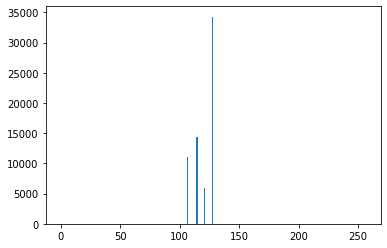

In [20]:
hist,bins,_=plt.hist(a_channel.flatten(),bins=256,range=(0,256))
plt.show()

In [21]:
#extracting the black color
#since in grayscale,the lowest value is the darkest
minVal=np.amin(a_channel)
print(minVal)

maxVal=np.amax(b_channel)
print(maxVal)

106
175


<h3>Segment the image based on the minimum value</h3>

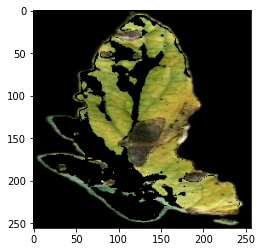

In [22]:
resImg=[]
image=cv2.cvtColor(cv2.imread(imgPath),cv2.COLOR_BGR2RGB)

for ele1,ele2 in zip(resArr.reshape(-1,3),image.reshape(-1,3)):
    a=ele1[1]
    if a==minVal:
        resImg.append([0,0,0])
    else:
        resImg.append([ele2[0],ele2[1],ele2[2]])
resImg=np.array(resImg,dtype=np.uint8).reshape(image.shape)
plt.imshow(resImg)

